Main with differnt models

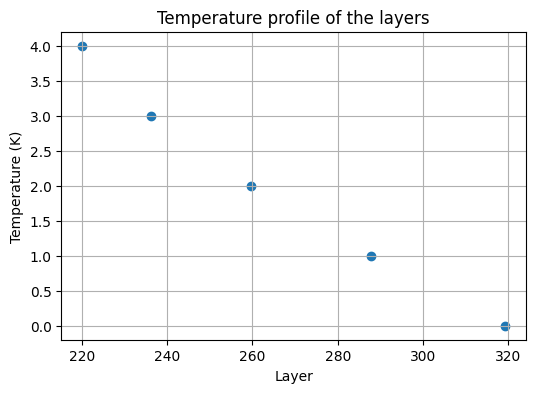

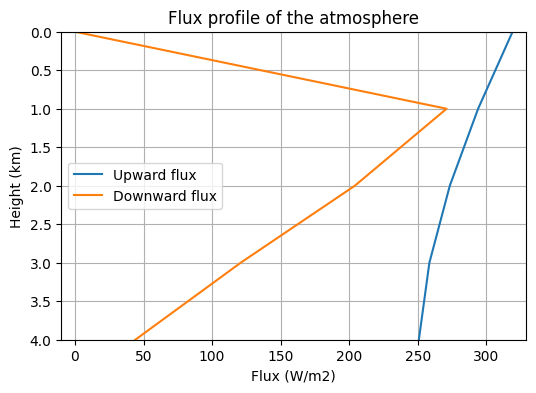

In [1]:
# N-layer system-simple

from System_matrix import N_layer_system
from System_solve import solve_N_layer, solve_Temps
from Fluxes import fluxes_N_layer
from plotting import plot_layers, plot_flux

import numpy as np
import math
import matplotlib.pyplot as plt

# Make epsilons
eps=np.array([1, 0.8, 0.6, 0.4, 0.2]).astype('float64') # Emissivity of each layer

M=N_layer_system(eps)

#inputs
S=1370 # Solar constant W/m2
A=0.3 # Albedo of the surface

Q=solve_N_layer(S, A, eps, M) # Energy absorbed in each layer in W/m2
Temps=solve_Temps(Q) # Temps in K

plot_layers(Temps)

#Fluxes

Flux_self,Flux_up, Flux_down = fluxes_N_layer(Temps, eps)
#layers 
plot_flux(Flux_up, Flux_down,np.arange(len(Temps))*1000)


Now the system take latent energy.

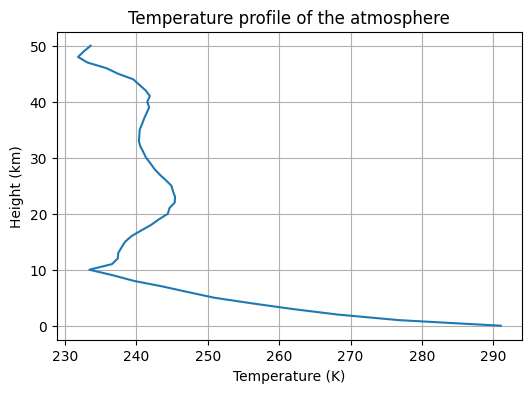

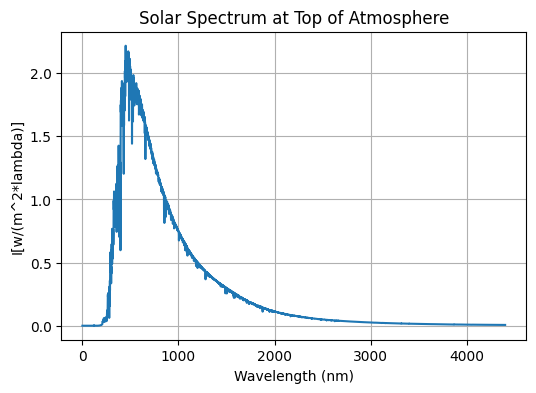

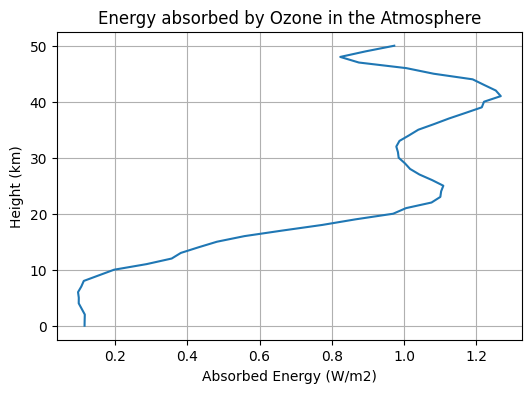

39.01719467004075 total energy absorped by ozone


In [11]:
#2 Stream model
from System_matrix import N_layer_system
from System_solve import solve_N_layer_latent, solve_Temps
from Real_atmosphere import read_atmosphere
from E_in_Ozone import Ozone_absorption_constant_253K_P, Sun_E_bands,E_abs_O
from plotting import plot_profile_atmosphere, plot_flux, plot_sun_spectrum,plot_E_abs_O

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

file="Spectra/Ozone_spectrum.csv"
dz=1000 # layer thickness in m
height=50 # height of atmosphere in km
z_interp, O3_interp, T_real, p_real, n_air = read_atmosphere("Standard_Atmospheres/us_standard.csv",height,dz)

#make bands
Bandends=[220,1100]
Bandwidth=10
band_interval_O, absorptivity_interval_mean = Ozone_absorption_constant_253K_P(file,Bandends, Bandwidth)
E_bands = Sun_E_bands(band_interval_O)

E_abs_height=E_abs_O(E_bands, absorptivity_interval_mean, band_interval_O, O3_interp, z_interp, dz=1000)

#epsilon for each layer, and latent heat flux. 
###Check N layers is equal to len(eps) and len(L)
### Manually

E_surface=S*(1-A)/4-np.sum(E_abs_height) #Total energy surface.
RL=0.3
EL=E_surface*RL #Latent heat flux % of surface energy

eps=np.array([1,0.24720534,0.20913575,0.1544279,0.1117628,0.08227208,0.06330484,0.04956816,0.0401921,0.03226433,0.02686877])*1.7
top_layers=np.zeros(40) #No latent heat in the top 30 layers
L= np.array([0,EL*0.28,EL*0.20,EL*0.18,EL*0.13,EL*0.08,EL*0.06,EL*0.04,EL*0.02,EL*0.01,0]) #Decreasing energy transfer
L=np.concatenate((L,top_layers))
L= L+E_abs_height #Add the ozone absorption to the latent heat flux
eps_top=top_layers+0.01
eps=np.concatenate((eps,eps_top)) #Make the rest of the layers very thin to radiation.
eps[0]=1

M=N_layer_system(eps)
Q,T=solve_N_layer_latent(E_surface, RL, M, L) # Energy absorbed in each layer in W/m2
Temps=solve_Temps(Q) # Temps in K
#Q=solve_N_layer(S, A, eps, M) # Energy absorbed in each layer in W/m2
#Temps=solve_Temps(Q)

plot_profile_atmosphere(Temps,z_interp)


plot_sun_spectrum("Spectra/Sun_spectra_TOA_1nm_1.csv")
plot_E_abs_O(E_abs_height,z_interp)
print(np.sum(E_abs_height),"total energy absorped by ozone")




In [ ]:
print(np.sum(E_abs_height))

39.01719467004075


In [ ]:
#Spectrum model.
from System_matrix import N_layer_system
from System_solve import solve_N_layer, solve_Temps
from Real_atmosphere import read_atmosphere
from E_in_Ozone import Ozone_absorption_constant_253K_P, Sun_E_bands,E_abs_O
from plotting import plot_layers, plot_flux, plot_sun_spectrum,plot_E_abs_O